In [1]:
# Import dependencies
import numpy as np
import pandas as pd

In [2]:
# Read 2020 and 2021 merged survey data
merged_df = pd.read_csv('merged_data.csv',encoding='cp1252',index_col=0)
merged_df.head()

,response id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [3]:
# Drop "response id" column, which repeats for each data set
merged_df = merged_df.drop(['response id'],axis=1)

In [4]:
# Confirm reponse id column has been dropped
merged_df.head()

,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,rw percentage (2020),...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,100% - I spent all of my time remote working,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,90%,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [5]:
# Convert spaces in column headers to underscores
merged_df.columns = merged_df.columns.str.replace(' ', '_')

In [6]:
# Confirm headers have been changed
merged_df.head()

,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others?,household,years_at_job,metro_or_regional,rw_percentage_(2020),...,if_no_covid:_i_would_have_choice_about_rw,productivity_(remote_vs_office),in-person:_hours__commuting_,in-person:_hours__working,in-person:_hours__personal/family_time,in-person:_hours_domestic_responsibilities,remote:_hours_commuting_,remote:_hours_working,remote:_hours_personal/family_time,remote:_hours_domestic_responsibilities
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,100% - I spent all of my time remote working,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,90%,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [7]:
# Check data types of all columns
merged_df.dtypes

birth_year                                      int64
gender                                         object
industry_desc                                  object
occupation_desc                                object
organization_size                              object
manage_others?                                 object
household                                      object
years_at_job                                   object
metro_or_regional                              object
rw_percentage_(2020)                           object
org_encouraged_rw?                             object
org_prepared_for_rw?                           object
rw_is_common_at_org?                           object
rw_permission_is_attainable                    object
rw_collaboration_easy?                         object
preferred_rw_percentage_(2020)                 object
preferred_rw_percentage_(future)               object
if_no_covid:_employer_encourage_rw_            object
if_no_covid:_employer_suppor

In [8]:
# Check for null values in each column
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column birth_year has 0 null values
Column gender has 0 null values
Column industry_desc has 0 null values
Column occupation_desc has 0 null values
Column organization_size has 0 null values
Column manage_others? has 136 null values
Column household has 0 null values
Column years_at_job has 0 null values
Column metro_or_regional has 0 null values
Column rw_percentage_(2020) has 0 null values
Column org_encouraged_rw? has 31 null values
Column org_prepared_for_rw? has 31 null values
Column rw_is_common_at_org? has 31 null values
Column rw_permission_is_attainable has 31 null values
Column rw_collaboration_easy? has 31 null values
Column preferred_rw_percentage_(2020) has 31 null values
Column preferred_rw_percentage_(future) has 136 null values
Column if_no_covid:_employer_encourage_rw_ has 0 null values
Column if_no_covid:_employer_support_rw has 0 null values
Column if_no_covid:_i_would_have_choice_about_rw has 0 null values
Column productivity_(remote_vs_office) has 0 null values
Col

In [9]:
# If a response to a question is left blank for categorical responses, replace it with "no response"
object_columns = ["manage_others?",
                 "org_encouraged_rw?",
                 "org_prepared_for_rw?",
                 "rw_is_common_at_org?",
                 "rw_permission_is_attainable",
                 "rw_collaboration_easy?",
                 "preferred_rw_percentage_(2020)",
                 "preferred_rw_percentage_(future)"]
merged_df[object_columns] = merged_df[object_columns].fillna("No response")

In [ ]:
# If a response to a question is left blank for numeric responses, replace it with zero??? or drop these?

In [10]:
# Check null values again to confirm they've been replaced
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column birth_year has 0 null values
Column gender has 0 null values
Column industry_desc has 0 null values
Column occupation_desc has 0 null values
Column organization_size has 0 null values
Column manage_others? has 0 null values
Column household has 0 null values
Column years_at_job has 0 null values
Column metro_or_regional has 0 null values
Column rw_percentage_(2020) has 0 null values
Column org_encouraged_rw? has 0 null values
Column org_prepared_for_rw? has 0 null values
Column rw_is_common_at_org? has 0 null values
Column rw_permission_is_attainable has 0 null values
Column rw_collaboration_easy? has 0 null values
Column preferred_rw_percentage_(2020) has 0 null values
Column preferred_rw_percentage_(future) has 0 null values
Column if_no_covid:_employer_encourage_rw_ has 0 null values
Column if_no_covid:_employer_support_rw has 0 null values
Column if_no_covid:_i_would_have_choice_about_rw has 0 null values
Column productivity_(remote_vs_office) has 0 null values
Column in-per

In [11]:
# Check for duplicate rows
merged_df.duplicated().sum()

1

In [12]:
# Drop duplicate
merged_df.drop_duplicates()

,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others?,household,years_at_job,metro_or_regional,rw_percentage_(2020),...,if_no_covid:_i_would_have_choice_about_rw,productivity_(remote_vs_office),in-person:_hours__commuting_,in-person:_hours__working,in-person:_hours__personal/family_time,in-person:_hours_domestic_responsibilities,remote:_hours_commuting_,remote:_hours_working,remote:_hours_personal/family_time,remote:_hours_domestic_responsibilities
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,100% - I spent all of my time remote working,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,90%,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,1995,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,Metro,30%,...,Somewhat likely,Iâ€™m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3015,1993,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,Metro,Less than 10% of my time,...,Very unlikely,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3016,1979,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,One parent family with dependent children,More than 5 years,Regional,Rarely or never,...,Very unlikely,My productivity is about same when I work remo...,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0
3017,1965,Female,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Yes,Couple with no dependent children,More than 5 years,Metro,Less than 10% of my time,...,Somewhat likely,My productivity is about same when I work remo...,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0


## Examine variables for bucketing

In [13]:
# Generate our categorical variable list
merged_df_cat = merged_df.dtypes[merged_df.dtypes == "object"].index.tolist()

In [14]:
# Check the number of unique values in each column
merged_df[merged_df_cat].nunique()

gender                                        5
industry_desc                                26
occupation_desc                              50
organization_size                             6
manage_others?                                3
household                                     8
years_at_job                                  3
metro_or_regional                             2
rw_percentage_(2020)                         13
org_encouraged_rw?                            6
org_prepared_for_rw?                          6
rw_is_common_at_org?                          6
rw_permission_is_attainable                   6
rw_collaboration_easy?                        6
preferred_rw_percentage_(2020)               18
preferred_rw_percentage_(future)             14
if_no_covid:_employer_encourage_rw_          10
if_no_covid:_employer_support_rw             10
if_no_covid:_i_would_have_choice_about_rw    10
productivity_(remote_vs_office)              12
dtype: int64

In [ ]:
## Based on the counts above, the following categorical variables have over 10 unique values and need to be bucketed before encoding: 
# industry_desc
# occupation_desc
# rw_percentage_(2020)
# preferred_rw_percentage_(2020)
# preferred_rw_percentage_(future)
# productivity_(remote_vs_office)

In [15]:
# Print the number of industries in the industry_desc column
industry_counts = merged_df.industry_desc.value_counts()
industry_counts

Education and Training                             294
Information Media and Telecommunications           263
Professional, Scientific and Technical Services    259
Other Services                                     222
Health Care and Social Assistance                  219
Financial and Insurance                            204
Retail Trade                                       173
Financial and Insurance Services                   173
Professional, Scientific and Technical             163
Manufacturing                                      149
Public Administration and Safety                   147
Construction                                       127
Transport, Postal and Warehousing                  104
Wholesale Trade                                     94
Administrative and Support Services                 76
Administrative and Support                          70
Arts and Recreation Services                        38
Arts and Recreation                                 35
Accommodat

<AxesSubplot:ylabel='Density'>

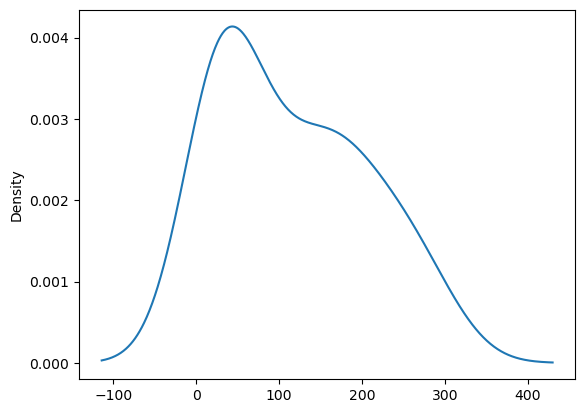

In [16]:
# Visualize the value counts
industry_counts.plot.density()

In [18]:
# Determine which values to replace
replace_industries = list(industry_counts[industry_counts < 150].index)

# Replace in DataFrame
for industry in replace_industries:
    merged_df.industry_desc = merged_df.industry_desc.replace(industry,"Other")

# Check to make sure binning was successful
merged_df.industry_desc.value_counts()

Other                                              1049
Education and Training                              294
Information Media and Telecommunications            263
Professional, Scientific and Technical Services     259
Other Services                                      222
Health Care and Social Assistance                   219
Financial and Insurance                             204
Retail Trade                                        173
Financial and Insurance Services                    173
Professional, Scientific and Technical              163
Name: industry_desc, dtype: int64

In [19]:
# Print the number of occupations in the occupation_desc column
occupation_counts = merged_df.occupation_desc.value_counts()
occupation_counts

Professionals                                                                               580
Managers                                                                                    503
Managers - Specialist Managers                                                              240
Clerical and administrative                                                                 223
Managers - Chief Executives, General Managers and Legislators                               191
Professionals - Business, Human Resource and Marketing Professionals                        166
Professionals - ICT Professionals                                                           108
Professionals - Education Professionals                                                     103
Sales                                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals                     76
Technicians and trades                  

<AxesSubplot:ylabel='Density'>

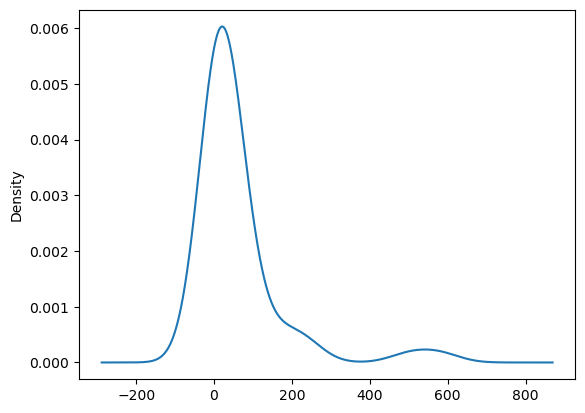

In [20]:
# Visualize the value counts
occupation_counts.plot.density()

In [21]:
# Determine which values to replace
replace_occupations = list(occupation_counts[occupation_counts < 75].index)

# Replace in DataFrame
for occupation in replace_occupations:
    merged_df.occupation_desc = merged_df.occupation_desc.replace(occupation,"Other")

# Check to make sure binning was successful
merged_df.occupation_desc.value_counts()

Other                                                                       750
Professionals                                                               580
Managers                                                                    503
Managers - Specialist Managers                                              240
Clerical and administrative                                                 223
Managers - Chief Executives, General Managers and Legislators               191
Professionals - Business, Human Resource and Marketing Professionals        166
Professionals - ICT Professionals                                           108
Professionals - Education Professionals                                     103
Sales                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals     76
Name: occupation_desc, dtype: int64

In [22]:
# Examine rw_percentage_(2020) responses - 
# Survey Question: Thinking about your current job, how much of your time did you spend remote working in the last 3 months?
merged_df['rw_percentage_(2020)'].value_counts()

100% - I spent all of my time remote working          909
50% - I spent about half of my time remote working    319
90%                                                   257
20%                                                   250
80%                                                   211
Less than 10% of my time                              207
30%                                                   179
40%                                                   162
10%                                                   136
60%                                                   135
70%                                                   126
Rarely or never                                        97
Rarely or never                                        31
Name: rw_percentage_(2020), dtype: int64

In [23]:
## Convert rw_percentage_(2020) responses to the number of remote workdays per week

rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'Rarely or never':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - I spent about half of my time remote working':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - I spent all of my time remote working':'4-5 days'}

merged_df['rw_percentage_(2020)']= merged_df['rw_percentage_(2020)'].map(rw_percentage_2020_map)

In [30]:
# Confirm new response counts
merged_df['rw_percentage_(2020)'].value_counts()

2-3 days    481
4-5 days    468
0-1 days    440
1-2 days    429
3-4 days    261
Name: rw_percentage_(2020), dtype: int64

In [25]:
# Examine productivity_(remote_vs_office) responses - 
# Survey Question: "This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  
# Please compare your productivity when you work remotely to when you work at your employerís workplace.  
# Roughly how productive are you, each hour, when you work remotely?"
merged_df['productivity_(remote_vs_office)'].value_counts()

My productivity is about same when I work remotely            767
Iâ€™m 50% more productive when working remotely (or more)     498
Iâ€™m 20% more productive when working remotely               437
Iâ€™m 30% more productive when working remotely               430
Iâ€™m 10% more productive when working remotely               212
Iâ€™m 40% more productive when working remotely               195
Iâ€™m 10% less productive when working remotely               168
Iâ€™m 20% less productive when working remotely               164
Iâ€™m 30% less productive when working remotely                81
Iâ€™m 50% less productive when working remotely (or less)      27
Iâ€™m 50% less productive when working remotely (or worse)     23
Iâ€™m 40% less productive when working remotely                17
Name: productivity_(remote_vs_office), dtype: int64

In [27]:
productivity_remote_vs_office_map = {'Iâ€™m 50% more productive when working remotely':'much more productive',
                          'Iâ€™m 40% more productive when working remotely':'much more productive',
                          'Iâ€™m 30% more productive when working remotely':'much more productive',
                          'Iâ€™m 20% more productive when working remotely':'more productive',
                          'Iâ€™m 10% more productive when working remotely':'more productive',
                          'My productivity is about same when I work remotely':'same productivity',
                          'Iâ€™m 10% less productive when working remotely':'less productive',
                          'Iâ€™m 20% less productive when working remotely':'less productive',
                          'Iâ€™m 30% less productive when working remotely':'much less productive',
                          'Iâ€™m 40% less productive when working remotely':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or less)':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or worse)':'much less productive'}

merged_df['productivity_(remote_vs_office)']= merged_df['productivity_(remote_vs_office)'].map(productivity_remote_vs_office_map)

In [29]:
# Confirm new response counts to productivity_(remote_vs_office)
merged_df['productivity_(remote_vs_office)'].value_counts()

same productivity       767
more productive         649
much more productive    625
less productive         332
much less productive    148
Name: productivity_(remote_vs_office), dtype: int64

In [31]:
# Examine preferred rw percentage (future) responses - 
# Survey Question: "Imagine that COVID-19 is cured or eradicated.   
# Going forward, how much of your work time would you prefer to work remotely?  
# If you work a 5 day week, each day of remote working equals 20% of your time."
merged_df['preferred_rw_percentage_(future)'].value_counts()

50% - About half of my time             583
100% - All of my time                   390
20%                                     284
80%                                     253
40%                                     219
60%                                     211
30%                                     172
70%                                     167
90%                                     158
Less than 10% of my time                139
No response                             136
I would prefer not to work remotely     110
10%                                     108
I would prefer not to work remotely      89
Name: preferred_rw_percentage_(future), dtype: int64

In [32]:
preferred_rw_percentage_future_map = {'Less than 10% of my time':'0-1 days',
                          'I would prefer not to work remotely':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

merged_df['preferred_rw_percentage_(future)']= merged_df['preferred_rw_percentage_(future)'].map(preferred_rw_percentage_future_map)

In [33]:
# Confirm new response counts to preferred_rw_percentage_(future)
merged_df['preferred_rw_percentage_(future)'].value_counts()

2-3 days       802
4-5 days       801
1-2 days       456
3-4 days       378
0-1 days       357
No response    136
Name: preferred_rw_percentage_(future), dtype: int64

In [34]:
merged_df.head()

,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others?,household,years_at_job,metro_or_regional,rw_percentage_(2020),...,if_no_covid:_i_would_have_choice_about_rw,productivity_(remote_vs_office),in-person:_hours__commuting_,in-person:_hours__working,in-person:_hours__personal/family_time,in-person:_hours_domestic_responsibilities,remote:_hours_commuting_,remote:_hours_working,remote:_hours_personal/family_time,remote:_hours_domestic_responsibilities
0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,4-5 days,...,Strongly disagree,NaN,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,1-2 days,...,Somewhat agree,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,1982,Male,Other,Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,2-3 days,...,Somewhat agree,less productive,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,NaN,...,Somewhat agree,same productivity,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,1991,Male,Other,Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,4-5 days,...,Strongly disagree,more productive,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

In [ ]:
# Merge one-hot encoded features and drop the originals
merged_enc_df = merged_df.merge(encode_df,left_index=True, right_index=True)
merged_enc_df = merged_enc_df.drop(merged_df_cat,1)
merged_enc_df.head()

In [ ]:
# Save cleaned and encoded dataframes as csv files
merged_df.to_csv("merged_df_cleaned.csv")
merged_enc_df.to_csv("merged_encoded_df.csv")